# Data in a day


## Import libraries

In [1]:
import pandas as pd
from sklearn import linear_model
%matplotlib inline

## Source the data

We need to get our data from firebase using their API - https://newton-decoded.firebaseio.com/falls.json

In [2]:
# Read some json into dataframe using a function from pandas
df = pd.read_json("https://newton-decoded.firebaseio.com/falls.json", orient="index")

## Explore and transform the data

Let's have a look at the first few rows of our data

In [4]:
df.head(7)

,x,y
-LRq6_ms6Q2oRYlbd_fj,1.21,0.81
-LRq6e6NU0YnoYVbVsfr,0.98,0.36
-LRq6frWv7Y2nAkJMNT3,1.61,0.36
-LRq6hI7-iEiR2yrr0eG,1.11,0.49
-LRq6kSUGQveuHnkBCqs,1.69,0.36
-LRq6m4eQ60ifWXk1sYS,1.44,0.36
-LRq6qWWxO_X9dyguZ6r,1.02,0.16


Ideally we'd like to change labels from x and y to something more meaningful i.e. height and time^2

In [5]:
df = df.rename(columns={'x':'height','y':'time^2'})
df.head()

,height,time^2
-LRq6_ms6Q2oRYlbd_fj,1.21,0.81
-LRq6e6NU0YnoYVbVsfr,0.98,0.36
-LRq6frWv7Y2nAkJMNT3,1.61,0.36
-LRq6hI7-iEiR2yrr0eG,1.11,0.49
-LRq6kSUGQveuHnkBCqs,1.69,0.36


Perfect! Now let's have a look at some summary stats for our data

In [6]:
df.describe()

,height,time^2
count,45.000000,45.000000
mean,1.464000,0.283333
std,0.452671,0.230720
min,0.620000,0.010000
25%,1.110000,0.160000
50%,1.500000,0.250000
75%,1.770000,0.360000
max,2.330000,1.210000


Now it's time to visualise the data

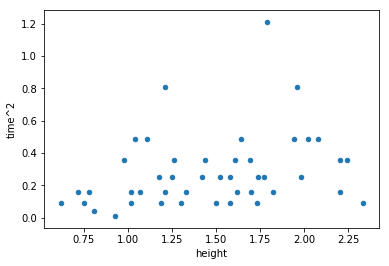

In [10]:
# Using your dataframe df as a starting point, create a scatter plot of the data
df.plot.scatter(x='height',y='time^2')

## Building a model

Build a linear mathematical model - this is using calculus under the hood to find the best line.

In [12]:
model = linear_model.LinearRegression()
model.fit(df[['height']],df[['time^2']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate your model

Now we've built a model we can make predictions. We'll add the results to a new column of our dataframe for convenience

In [13]:
df['prediction'] = model.predict(df[['height']])
df.head()

,height,time^2,prediction
-LRq6_ms6Q2oRYlbd_fj,1.21,0.81,0.244338
-LRq6e6NU0YnoYVbVsfr,0.98,0.36,0.209027
-LRq6frWv7Y2nAkJMNT3,1.61,0.36,0.305748
-LRq6hI7-iEiR2yrr0eG,1.11,0.49,0.228985
-LRq6kSUGQveuHnkBCqs,1.69,0.36,0.318030


Looking at tables of numbers is not great for humans. Eyeballing the model is a great to get a feel for what we have built

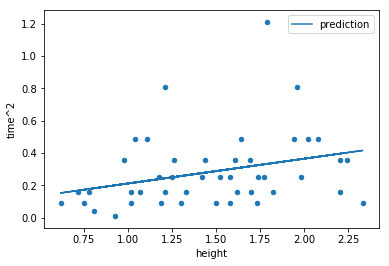

In [14]:
scatter = df.plot.scatter(x='height',y='time^2')
# plot a line of your predictions on top of your scatter plot
df.plot.line(x='height', y = 'prediction', ax=scatter)

We can also be quantitative when we evaluate our predictions by looking at the error between our predictions and our model.

The score gives us the R-Squared value 1 is perfect predition, 0 is terrible.

In [15]:
model.score(df[['height']],df[['time^2']])

0.09073105412662363